In [1]:
## Any distribution plots for presentation visuals?

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

## Hammers:
         h0 = mean return >0
         h1 = mean return <0         

In [7]:
hammer_samples=pd.read_csv('/Users/devirughani/Desktop/Ironhack/Week_9_Final/Streamlit_App/Data/Hypothesis_Test_Sample_Data/hammer_samples.csv')

In [8]:
hammer_samples.dtypes

Date                       object
Open                      float64
High                      float64
Low                       float64
Close                     float64
Hammer                      int64
Return % 5 days after     float64
Return % 14 days after    float64
Return % 28 days after     object
dtype: object

In [9]:
hammer_samples['Return % 28 days after'] = hammer_samples['Return % 28 days after'].replace(' ', np.nan)   

In [10]:
hammer_samples.isna().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Hammer                    0
Return % 5 days after     0
Return % 14 days after    0
Return % 28 days after    2
dtype: int64

In [11]:
hammer_samples=hammer_samples.dropna()

In [12]:
hammer_samples['Return % 28 days after']= pd.to_numeric(hammer_samples["Return % 28 days after"])

In [13]:
hammer_samples.describe()

,Open,High,Low,Close,Hammer,Return % 5 days after,Return % 14 days after,Return % 28 days after
count,213.000000,213.000000,213.000000,213.000000,213.0,213.000000,213.000000,213.000000
mean,1141.722535,1148.558216,1090.745305,1136.525587,1.0,-0.552674,0.267411,2.574952
std,1317.152583,1324.702459,1270.366090,1312.636356,0.0,6.112993,13.360121,16.131633
min,83.300000,83.300000,80.200000,83.100000,1.0,-24.708995,-79.384183,-79.188809
25%,263.300000,263.700000,250.000000,262.400000,1.0,-4.172658,-6.373626,-5.627414
50%,640.050000,640.050000,602.400000,627.750000,1.0,-0.938202,0.006410,1.366358
75%,1348.000000,1353.500000,1248.000000,1317.900000,1.0,3.114286,4.880290,10.025000
max,5570.000000,5589.850000,5425.000000,5531.050000,1.0,22.122093,66.149964,107.173756


## 5 days

In [14]:
five_day_mean_ham=hammer_samples['Return % 5 days after'].mean()
five_day_mean_ham

-0.5526735116307503

In [15]:
five_day_data_ham=hammer_samples['Return % 5 days after']

In [16]:
t_statistic, p_value = st.ttest_1samp(five_day_data_ham, popmean =0, alternative = "less")
print("The t statistic of our sample is: {:.2f} and the corresponding p-value is: {:.2f}".format(t_statistic, p_value))

The t statistic of our sample is: -1.32 and the corresponding p-value is: 0.09


In [17]:
st.t.ppf(0.05, df = 212)

-1.6520729200433553

TypeError: plot got an unexpected keyword argument 'y'

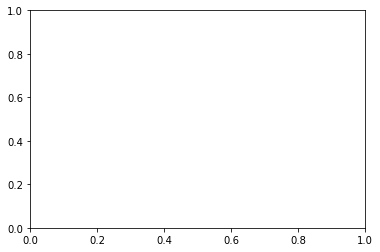

In [46]:
x = np.linspace(83, 5570, 213)
y = st.t.pdf(x, df=212)
plt.plot(x = x, y = y)
plt.show()


/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

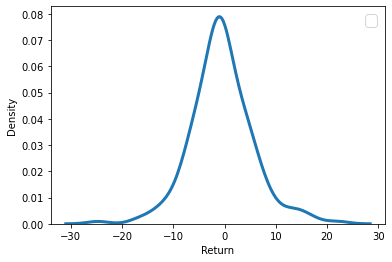

In [49]:
sns.distplot(five_day_data_ham, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.xlabel('Return')
plt.ylabel('Density')

In [60]:
(sum(five_day_data_ham>0)/len(five_day_data_ham))*100

40.845070422535215

## 14 days

In [18]:
fourteen_day_mean_ham=hammer_samples['Return % 14 days after'].mean()
'{:.2f}'.format(fourteen_day_mean_ham)

'0.27'

In [19]:
fourteen_day_data_ham=hammer_samples['Return % 14 days after']

In [20]:
t_statistic, p_value = st.ttest_1samp(fourteen_day_data_ham, popmean = 0, alternative = "less")
print("The t statistic of our sample is: {:.2f} and the corresponding p-value is: {:.2f}".format(t_statistic, p_value))

The t statistic of our sample is: 0.29 and the corresponding p-value is: 0.61


/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

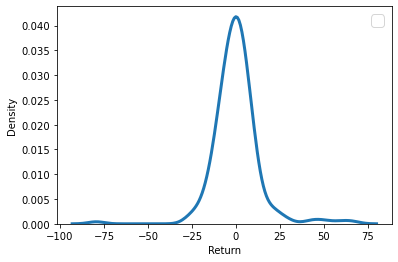

In [51]:
sns.distplot(fourteen_day_data_ham, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
    
# Plot formatting
plt.legend(prop={'size': 16})
plt.xlabel('Return')
plt.ylabel('Density')

In [63]:
(sum(fourteen_day_data_ham>0)/len(fourteen_day_data_ham))*100

50.23474178403756

## 28 days

In [21]:
twentyeight_day_mean_ham=hammer_samples['Return % 28 days after'].mean()
twentyeight_day_mean_ham

2.5749515800304885

In [22]:
twentyeight_day_data_ham=hammer_samples['Return % 28 days after']
twentyeight_day_data_ham

0     -10.811111
1      -6.322702
2       2.226230
3       1.819085
4       5.103448
         ...    
210   -10.388946
211   -23.980041
212    26.969697
213    38.705882
214    21.825095
Name: Return % 28 days after, Length: 213, dtype: float64

In [23]:
t_statistic, p_value = st.ttest_1samp(twentyeight_day_data_ham, popmean = 0, alternative = "less")
print("The t statistic of our sample is: {:.2f} and the corresponding p-value is: {:.2f}".format(t_statistic, p_value))

The t statistic of our sample is: 2.33 and the corresponding p-value is: 0.99


In [62]:
(sum(twentyeight_day_data_ham>0)/len(twentyeight_day_data_ham))*100

55.39906103286385

In [24]:
#twentyeight_day_mean_ham = hammer_samples['Return % 28 days after'].mean()
#twentyeight_day_std_ham = hammer_samples['Return % 28 days after'].std(ddof=1)
#t = ( twentyeight_day_mean_ham  - 0) / ( twentyeight_day_std_ham / np.sqrt(213))
#print("The mean of our sample is {:.2f}".format(twentyeight_day_mean_ham))
#print("The std of our sample is {:.2f}".format(twentyeight_day_std_ham))
#print("The t statistic of our sample is {:.2f}".format(t))

/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

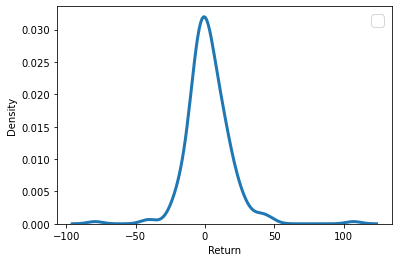

In [52]:
sns.distplot(twentyeight_day_data_ham, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
plt.legend(prop={'size': 16})
plt.xlabel('Return')
plt.ylabel('Density')

## Shooting Stars
     h0 = mean return >0
     h1 = mean return <0

In [29]:
shooting_star_samples=pd.read_csv('/Users/devirughani/Desktop/Ironhack/Week_9_Final/Streamlit_App/Data/Hypothesis_Test_Sample_Data/shooting_star_samples.csv')

In [30]:
shooting_star_samples.describe()

,Open,High,Low,Close,Shooting Star,Return % 5 days after,Return % 14 days after,Return % 28 days after
count,266.000000,266.000000,266.000000,266.000000,266.0,266.000000,264.000000,263.000000
mean,1216.859023,1268.389098,1210.878008,1224.938346,1.0,0.009960,-0.192218,-1.284491
std,1290.007135,1344.721994,1283.078810,1297.607201,0.0,6.039616,10.595355,15.136507
min,38.950000,43.900000,38.250000,38.950000,1.0,-33.999355,-40.720339,-48.465473
25%,276.425000,290.700000,276.200000,277.775000,1.0,-2.269641,-5.660660,-9.239277
50%,779.000000,822.275000,773.900000,784.275000,1.0,0.344884,-0.069234,-1.614578
75%,1501.225000,1538.462500,1497.912500,1508.275000,1.0,2.727562,4.381383,6.331225
max,6350.000000,6750.000000,6305.000000,6469.900000,1.0,23.304473,78.415970,77.496051


In [31]:
shooting_star_samples.isna().sum()

Date                      0
Open                      0
High                      0
Low                       0
Close                     0
Shooting Star             0
Return % 5 days after     0
Return % 14 days after    2
Return % 28 days after    3
dtype: int64

In [32]:
shooting_star_samples=shooting_star_samples.dropna()

## 5 days

In [33]:
five_day_mean_ss=shooting_star_samples['Return % 5 days after'].mean()
five_day_mean_ss

-0.04446858993124286

In [34]:
five_day_data_ss=shooting_star_samples['Return % 5 days after']

In [35]:
t_statistic, p_value = st.ttest_1samp(five_day_data_ss, popmean = 0, alternative = "less")
print("The t statistic of our sample is: {:.2f} and the corresponding p-value is: {:.2f}".format(t_statistic, p_value))

The t statistic of our sample is: -0.12 and the corresponding p-value is: 0.45


In [64]:
(sum(five_day_data_ss>0)/len(five_day_data_ss))*100

51.71102661596958

/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

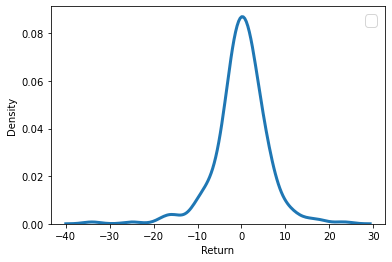

In [53]:
sns.distplot(five_day_data_ss, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
plt.legend(prop={'size': 16})
plt.xlabel('Return')
plt.ylabel('Density')

## 14 days

In [36]:
fourteen_day_mean_ss=shooting_star_samples['Return % 14 days after'].mean()
fourteen_day_mean_ss

-0.2157358504190097

In [37]:
fourteen_day_data_ss=shooting_star_samples['Return % 14 days after']

In [38]:
t_statistic, p_value = st.ttest_1samp(fourteen_day_data_ss, popmean = 0, alternative = "less")
print("The t statistic of our sample is: {:.2f} and the corresponding p-value is: {:.2f}".format(t_statistic, p_value))

The t statistic of our sample is: -0.33 and the corresponding p-value is: 0.37


In [65]:
(sum(fourteen_day_data_ss>0)/len(fourteen_day_data_ss))*100

48.28897338403042

/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

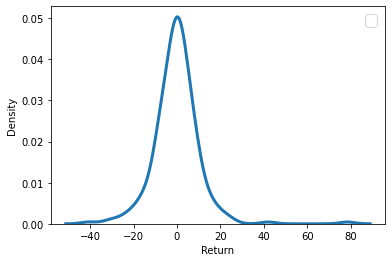

In [54]:
sns.distplot(fourteen_day_data_ss, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
plt.legend(prop={'size': 16})
plt.xlabel('Return')
plt.ylabel('Density')

## 28 days

In [39]:
twentyeight_day_mean_ss=shooting_star_samples['Return % 28 days after'].mean()
twentyeight_day_mean_ss

-1.2844910710808812

In [40]:
twentyeight_day_data_ss=shooting_star_samples['Return % 28 days after']

In [41]:
t_statistic, p_value = st.ttest_1samp(twentyeight_day_data_ss, popmean = 0, alternative = "less")
print("The t statistic of our sample is: {:.2f} and the corresponding p-value is: {:.2f}".format(t_statistic, p_value))

The t statistic of our sample is: -1.38 and the corresponding p-value is: 0.08


In [66]:
(sum(twentyeight_day_data_ss>0)/len(twentyeight_day_data_ss))*100

42.20532319391635

/Users/devirughani/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.


Text(0, 0.5, 'Density')

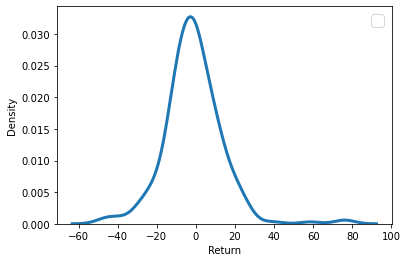

In [55]:
sns.distplot(twentyeight_day_data_ss, hist = False, kde = True,
                 kde_kws = {'linewidth': 3})
plt.legend(prop={'size': 16})
plt.xlabel('Return')
plt.ylabel('Density')